In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline

### Useful Link for Ridge and Lasso Regression
#### https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/

### In this assignment, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:

##### Use a pre-built implementation of regression to run polynomial regression
##### Use matplotlib to visualize polynomial regressions
##### Use a pre-built implementation of regression to run polynomial regression, this time with L2 penalty
##### Use matplotlib to visualize polynomial regressions under L2 regularization
##### Choose best L2 penalty using cross-validation.
##### Assess the final fit using test data.

#### Copy and paste an equivalent of ‘polynomial_sframe’ function from Module 3 (Polynomial Regression). This function accepts an array ‘feature’ (of type pandas.Series) and a maximal ‘degree’ and returns an data frame (of type pandas.DataFrame) with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [54]:
def polynomial_dataframe(feature, degree): 
    feature.name = None
    poly_dataframe = pd.DataFrame(feature,columns=['power_1'])
    
    if degree > 1:
        for power in range(2, degree+1):
            name = 'power_' + str(power)
            poly_dataframe[name] = feature ** power
    return poly_dataframe

In [ ]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 
              'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 
              'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [ ]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict)

In [46]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0


In [50]:
sales = sales.sort_values(by=['sqft_living'])[['sqft_living', 'price']]

#### Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using `polynomial_sframe()` and fit a model with these features. When fitting the model, use an L2 penalty of 1.5e-5:

In [205]:
l2_small_penalty = 1.5e-5

##### Note: When we have so many features and so few data points, the solution can become highly numerically unstable, which can sometimes lead to strange unpredictable results. Thus, rather than using no regularization, we will introduce a tiny amount of regularization (l2_penalty=1.5e-5) to make the solution numerically stable. (In lecture, we discussed the fact that regularization can also help with numerical stability, and here we are seeing a practical example.)

In [197]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)

In [198]:
model = Ridge(alpha=l2_small_penalty, normalize=True)
feature_name = poly15_data.columns

In [199]:
model.fit(poly15_data[feature_name], sales['price'])

Ridge(alpha=1.5e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

####  Quiz Question: What’s the learned value for the coefficient of feature power_1?

In [200]:
model.coef_[0]

124.8733064815269

### Observe Overfitting
#### Recall from Module 3 (Polynomial Regression) that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Module 3.

In [70]:
set_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

In [72]:
set_1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,8658300340,20140523T000000,80000.0,1.0,0.75,430.0,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200.0,7500.0
1,1352300580,20141114T000000,247000.0,1.0,1.00,460.0,4120,1.0,0,0,...,4,460,0,1937,0,98055,47.4868,-122.199,990.0,4120.0
2,1320069249,20141020T000000,192500.0,1.0,1.00,470.0,63737,1.0,0,2,...,5,470,0,1924,0,98022,47.2163,-121.984,1350.0,46762.0
3,1437500015,20140709T000000,150000.0,3.0,0.75,490.0,38500,1.5,0,0,...,5,490,0,1959,0,98014,47.7112,-121.315,800.0,18297.0
4,0859000110,20141002T000000,125000.0,1.0,1.00,500.0,7440,1.0,0,0,...,5,500,0,1928,0,98106,47.5252,-122.362,1350.0,7440.0


In [206]:
l2_small_penalty = 1e-9
l2_large_penalty = 1.23e2

In [208]:
def different_data_set(dataset, degree, l2_penalty):
    simple_set = dataset.sort_values(by=['sqft_living'])[['sqft_living', 'price']]
    poly_data_set = polynomial_dataframe(simple_set['sqft_living'], degree)
    
    ridge_model = Ridge(alpha=l2_penalty, normalize=True)
    features_name = poly_data_set.columns
    ridge_model.fit(poly_data_set[features_name], simple_set['price'])
    print(ridge_model.coef_, ridge_model.intercept_)
    
    plt.scatter(poly_data_set['power_1'], simple_set['price'])
    plt.plot(poly_data_set['power_1'], ridge_model.predict(poly_data_set[features_name]), 'red')
    plt.figure()

#### QUIZ QUESTION: For the models learned with regularization in each of these training sets, what are the smallest and largest values you learned for the coefficient of feature power_1?

[ 5.44669418e+02 -3.55447624e-01  1.22446390e-04 -1.17175330e-08
 -3.90512453e-13 -1.39076009e-17  1.47860295e-20  6.87491314e-25
 -7.57203667e-29 -1.04097304e-32 -3.71844083e-37  3.39989344e-41
  5.56591965e-45  2.53761314e-49 -3.35152865e-53] 23888.818497417844
[ 8.59362658e+02 -8.18118287e-01  4.28879989e-04 -9.12770682e-08
 -2.69604373e-12  3.73980310e-15 -1.42711938e-19 -6.30794599e-23
 -1.44559682e-27  7.44321287e-31  9.25865969e-35  3.28004508e-41
 -1.29543494e-42 -1.38781273e-46  1.66546451e-50] -55614.6433846195
[-7.55395866e+02  9.75579416e-01 -4.58945926e-04  7.77957832e-08
  7.15013922e-12 -2.88602036e-15 -2.13677905e-20  3.38085224e-23
  2.19178229e-27 -1.97067817e-31 -4.15993137e-35 -1.80196216e-39
  3.19071176e-43  5.08456936e-47 -3.93304275e-51] 470987.8455376581
[ 1.11944570e+03 -9.83760207e-01  3.38770909e-04  3.60377058e-08
 -4.37813944e-11  5.77191517e-15  7.66795388e-19 -9.49297629e-23
 -1.96030834e-26 -2.10879407e-32  3.31005014e-34  3.47733976e-38
 -2.43039332e-4

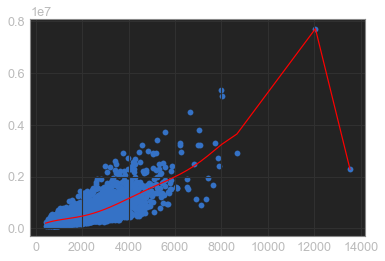

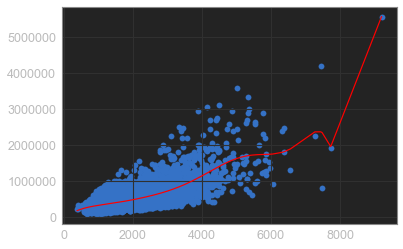

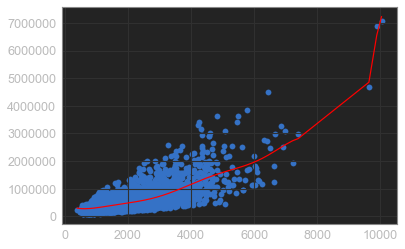

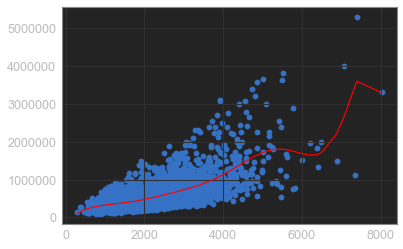

In [209]:
for i in range(1, 5):
    different_data_set(globals()['set_{}'.format(str(i))], 15, l2_small_penalty)

[2.32806803e+00 3.53621608e-04 3.31969692e-08 2.00082477e-12
 1.11492559e-16 6.57786122e-21 4.12939525e-25 2.70393755e-29
 1.81614763e-33 1.23824277e-37 8.51872481e-42 5.89455598e-46
 4.09542560e-50 2.85464889e-54 1.99547476e-58] 539103.0310577954
[2.09756903e+00 3.90817483e-04 6.67189944e-08 8.90002997e-12
 9.72639877e-16 9.69733682e-20 9.50564475e-24 9.44491031e-28
 9.57191338e-32 9.86945155e-36 1.03101115e-39 1.08729784e-43
 1.15453748e-47 1.23211305e-51 1.31986696e-55] 529853.0253577976
[2.28906258e+00 4.12472190e-04 6.08835345e-08 6.58572163e-12
 6.15278155e-16 5.64446634e-20 5.28834396e-24 5.07091402e-28
 4.94657273e-32 4.88043809e-36 4.85009106e-40 4.84161534e-44
 4.84635021e-48 4.85883628e-52 4.87558469e-56] 533640.1140974432
[2.08596194e+00 4.05035772e-04 7.46864647e-08 1.13096608e-11
 1.45864442e-15 1.73561251e-19 2.01609632e-23 2.34605255e-27
 2.75636073e-31 3.27043069e-35 3.91046855e-39 4.70118041e-43
 5.67212304e-47 6.85958087e-51 8.30843630e-55] 524562.9690466832


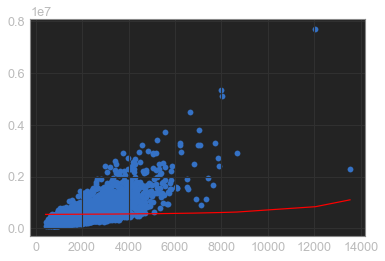

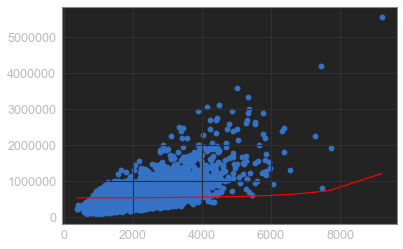

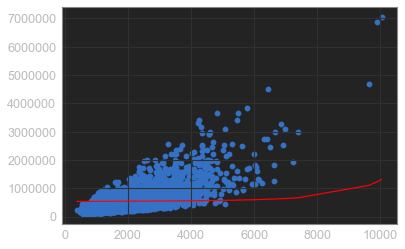

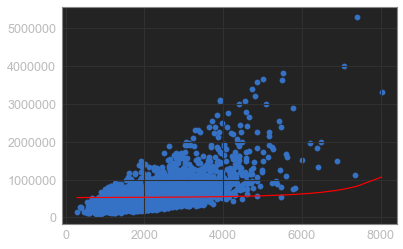

In [204]:
for i in range(1, 5):
    different_data_set(globals()['set_{}'.format(str(i))], 15, l2_large_penalty)

### Selecting an L2 penalty via cross-validation
#### Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.
#### To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. We reserve 10% of the data as the test set and randomly shuffle the remainder. Le'ts call the shuffled data 'train_valid_shuffled'

In [97]:
train_valid_shuffled = pd.read_csv('wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('wk3_kc_house_test_data.csv', dtype=dtype_dict)

#### Divide the combined training and validation set into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

In [98]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

In [ ]:
for i in range(k):
    start = (n * i) // k
    end = (n * (i+1)) // k - 1
    print(i, (start, end)) 

#### If the observations are grouped into 10 segments, the segment i is given by
#### Meanwhile, to choose the remainder of the data that's not part of the segment i, we select two slices (0:start) and (end+1:n) and paste them together.

In [109]:
train_set = train_valid_shuffled[start: end+1]
validation_set = train_valid_shuffled[0:start].append(train_valid_shuffled[end+1:n])

0 (0, 1938) 1938
1 (1939, 3878) 1939
2 (3879, 5817) 1938
3 (5818, 7757) 1939
4 (7758, 9697) 1939
5 (9698, 11636) 1938
6 (11637, 13576) 1939
7 (13577, 15515) 1938
8 (15516, 17455) 1939
9 (17456, 19395) 1939


#### Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe containing input features (e.g. poly15_data) and (iv) column of output values (e.g. price). The function returns the average validation error using k segments as validation sets. We shall assume that the input dataframe does not contain the output column.

In [178]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    n = len(data)
    RSS_list = []
    for i in range(k):
        start = (n * i) // k
        end = (n * (i+1)) // k - 1
        
        validation_set = data[start: end+1]
        validation_set_output = output[start: end+1]
        
        train_set = data[0:start].append(data[end+1:n])
        train_set_output = output[0:start].append(output[end+1:n])
        
        CV_model = Ridge(alpha=l2_penalty, normalize=True)
        
        CV_model.fit(train_set, train_set_output)
        
        RSS_list.append(np.sum((validation_set_output - CV_model.predict(validation_set)) ** 2))
    return np.mean(RSS_list)

#### Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
##### We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
##### Report which L2 penalty produced the lowest average validation error.

In [120]:
l2_penalty_list = np.logspace(3, 9, num=13)

In [122]:
train_valid_shuffled_poly15 = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

In [179]:
for L2_penalty in l2_penalty_list:
    result = pd.DataFrame(k_fold_cross_validation(10, L2_penalty, train_valid_shuffled_poly15, 
                                              train_valid_shuffled['price']), index=l2_penalty_list, columns=['RSS'])
    
result.index.name = 'Value of L2 Penalty'

In [182]:
for L2_penalty in l2_penalty_list:
    print(k_fold_cross_validation(10, L2_penalty, train_valid_shuffled_poly15, 
                                              train_valid_shuffled['price']))

264977361036975.94
265692935858318.25
265924368957215.66
265998081509342.7
266021444553980.5
266028837918724.5
266031176438467.84
266031915996607.34
266032149870752.5
266032223828783.66
266032247216419.9
266032254612245.2
266032256951011.06


#### What is the best value for the L2 penalty according to 10-fold validation?
##### Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!

In [181]:
result['RSS'].argmin()

f:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  """Entry point for launching an IPython kernel.


1000.0

#### Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset.

In [154]:
final_poly_data = polynomial_dataframe(train_valid_shuffled['sqft_living'], 15)

In [183]:
final_model = Ridge(alpha=1000, normalize=True)

In [184]:
final_model.fit(final_poly_data, train_valid_shuffled['price'])

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [186]:
test_poly_data = polynomial_dataframe(test['sqft_living'], 15)

In [187]:
np.sum((final_model.predict(test_poly_data) - test['price']) ** 2) 

283856861224150.9